# 붓꽃 품종 예측
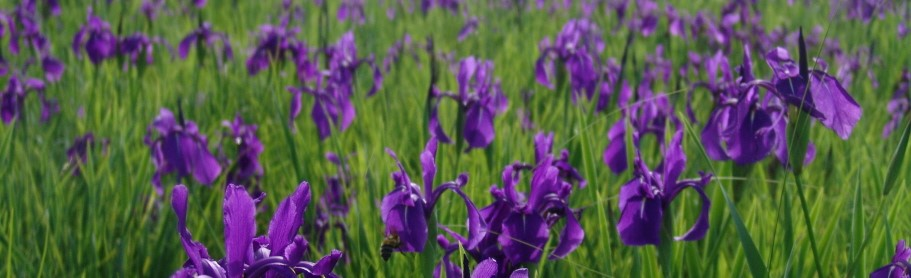

## 목적
의사 결정 나무(Decision Tree)를 이용해 붓꽃의 종을 간단한 예측 진행

## 데이터의 컬럼
id: 데이터의 행 인덱스  
species: 꽃의 종류  
sepal length (cm): 꽃받침의 길이  
petal length (cm): 꽃잎의 길이  
sepal width (cm): 꽃받침의 폭  
petal width (cm): 꽃잎의 폭  

In [106]:
import pandas as pd

# 데이터 변수로 읽어오기
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('sample_submission.csv')

display(train.head())
display(test.head())
display(submission.head())

,id,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,0,4.6,3.6,1.0,0.2,0
1,1,5.7,4.4,1.5,0.4,0
2,2,6.7,3.1,4.4,1.4,1
3,3,4.8,3.4,1.6,0.2,0
4,4,4.4,3.2,1.3,0.2,0


,id,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0,6.1,2.8,4.7,1.2
1,1,5.7,3.8,1.7,0.3
2,2,7.7,2.6,6.9,2.3
3,3,6.0,2.9,4.5,1.5
4,4,6.8,2.8,4.8,1.4


,id,species
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


In [107]:
# 피처 이름 변경
feature_names = {
    'sepal length (cm)': 'sepal_length',
    'petal length (cm)': 'petal_length',
    'sepal width (cm)': 'sepal_width',
    'petal width (cm)': 'petal_width'
}
train = train.rename(columns=feature_names)
test = test.rename(columns=feature_names)

# 데이터 개수 확인
print('train 데이터 개수: ', len(train))
print('test 데이터 개수: ', len(test))
print('submission 데이터 개수: ', len(submission))

train 데이터 개수:  120
test 데이터 개수:  30
submission 데이터 개수:  30


In [108]:
# 학습 데이터 설정
feature_names = ['sepal_length', 'petal_length', 'sepal_width', 'petal_width']
train_x = train[feature_names]
train_y = train['species']

In [109]:
# Decision Tree Classifier 모듈 임포트
from sklearn.tree import DecisionTreeClassifier

# 모델링
model = DecisionTreeClassifier(max_depth=5, random_state=32)

In [110]:
# 하이퍼파라미터 설정
model = DecisionTreeClassifier(
    criterion='gini',
    splitter='best',
    max_depth=5,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0,
    max_features=None,
    random_state=32,
    max_leaf_nodes=None,
    min_impurity_decrease=0,
    class_weight=None,
    ccp_alpha=0
)

DecisionTreeClassifier 하이퍼파라미터
model = DecisionTreeClassifier(  
    criterion='gini',  
    splitter='best',  
    max_depth=5,  
    min_samples_split=2,  
    min_samples_leaf=1,  
    min_weight_fraction_leaf=0,  
    max_features=None,  
    random_state=32,  
    max_leaf_nodes=None,  
    min_impurity_decrease=0,  
    class_weight=None,  
    ccp_alpha=0  
)  

1. **criterion (크라이티리언):**
   - 결정 트리에서 노드를 분할하는 데 사용된다.
   - 'gini': 지니 불순도(Gini impurity)를 사용하여 노드를 분할한다. 값이 낮을수록 분할이 좋다.
   - 다른 옵션으로는 'entropy'가 있다.

2. **splitter (스플리터):**
   - 노드를 분할하는 데 사용되는 전략이다.
   - 'best': 최선의 분할을 찾아 적용한다.
   - 'random': 무작위로 분할을 수행한다.

3. **max_depth (맥스 뎁스):**
   - 트리의 최대 깊이를 지정한다. 트리의 깊이가 깊어질수록 모델의 복잡도가 증가하고, 훈련 데이터에 대한 정확도가 높아질 수 있지만 오버피팅의 위험이 있다.

4. **min_samples_split (분할 최소 샘플 수):**
   - 노드를 분할하기 위해 필요한 최소 샘플 수를 지정한다. 이 값보다 작은 수의 샘플이 있는 경우 더 이상 분할하지 않는다.

5. **min_samples_leaf (리프 최소 샘플 수):**
   - 리프 노드에 필요한 최소 샘플 수를 지정한다. 리프 노드에 적어도 이 수의 샘플이 있어야 한다.

6. **min_weight_fraction_leaf (리프 노드의 최소 가중치 비율):**
   - 리프 노드에 필요한 최소 가중치 비율을 지정한다.

7. **max_features (최대 특성 수):**
   - 각 노드에서 분할에 사용할 최대 특성 수를 지정한다.
   - `None`, 정수, 실수, 문자열('sqrt', 'log2', 'auto')로 지정할 수 있다.

8. **random_state (랜덤 시드):**
   - 모델을 학습할 때 사용되는 랜덤 시드 값이다. 동일한 결과를 재현하려면 동일한 랜덤 시드를 사용해야 한다.

9. **max_leaf_nodes (리프 노드의 최대 수):**
   - 트리의 리프 노드의 최대 수를 지정한다.

10. **min_impurity_decrease (분할을 수행할 최소 불순도 감소량):**
    - 이 값보다 분할이 불순도를 얼마나 감소시켜야 하는지를 나타내는 임계값이다.

11. **class_weight (클래스 가중치):**
    - 클래스에 대한 가중치를 지정할 수 있습니다. 불균형한 클래스 분포를 조절하기 위해 사용된다.

12. **ccp_alpha (복잡성 가지 치우침 매개변수):**
    - Cost-Complexity Pruning (CCP)을 사용하여 트리의 가지를 제어하는 매개변수이다. 낮은 값은 더 많은 가지를 유지하게 한다.


In [111]:
# 학습
model.fit(train_x, train_y)

DecisionTreeClassifier(ccp_alpha=0, max_depth=5, min_impurity_decrease=0,
                       min_weight_fraction_leaf=0, random_state=32)

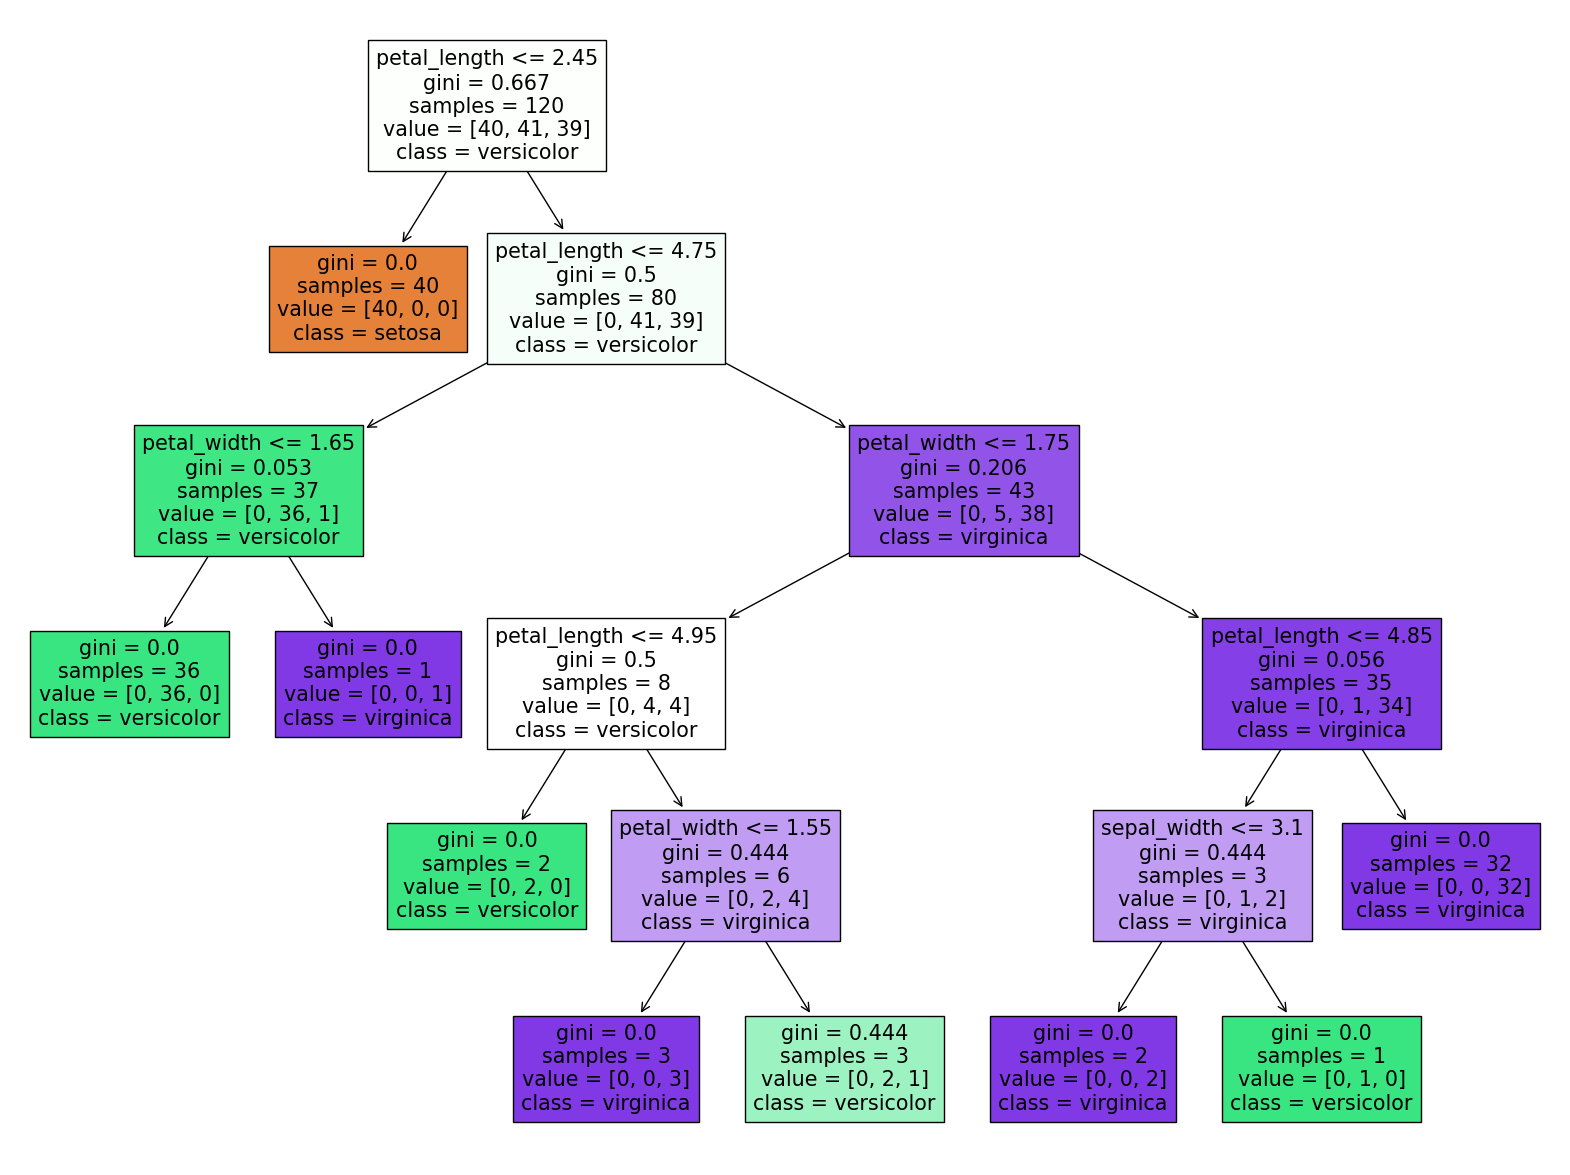

In [114]:
# 의사결정 트리 시각화를 위해 필요한 라이브러리 임포트
from sklearn import tree

# 시각화할 트리의 크기를 설정
plt.figure(figsize=(20,15))
tree.plot_tree(model,
    class_names=['setosa', 'versicolor', 'virginica'],
    feature_names=feature_names,
    filled=True,
)
plt.show()

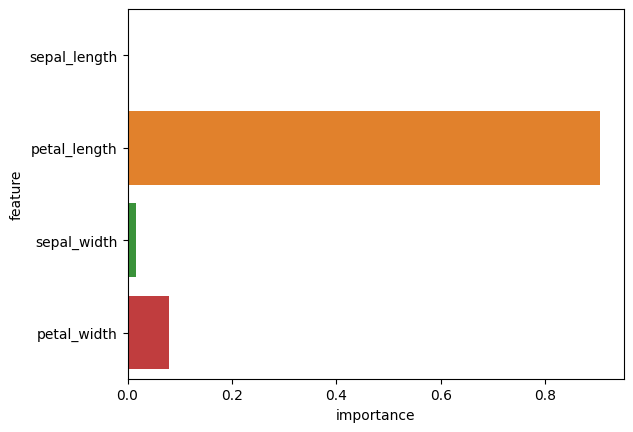

In [113]:
# 시각화를 위해 필요한 라이브러리 임포트
import seaborn as sns
import matplotlib.pyplot as plt

# 모델의 특성 중요도 가져옴.
importance = model.feature_importances_

# 특성 이름과 중요도를 데이터로 구성
data = {'feature': feature_names, 'importance': list(importance)}

# 데이터프레임을 생성
importance_df = pd.DataFrame(data)

# 특성 중요도를 시각화
sns.barplot(x = 'importance', y = 'feature', data = importance_df)
plt.show()

중요도  
petal_length > petal_width > sepal_width > sepal_length

In [139]:
# 학습 데이터 설정 - 두개 피처만 선택
feature_names = ['petal_width', 'petal_length']
train_x = train[feature_names]
train_y = train['species']

In [140]:
# 모델링
model = DecisionTreeClassifier(max_depth=2, random_state=32)

In [141]:
# 학습
model.fit(train_x, train_y)

DecisionTreeClassifier(max_depth=2, random_state=32)

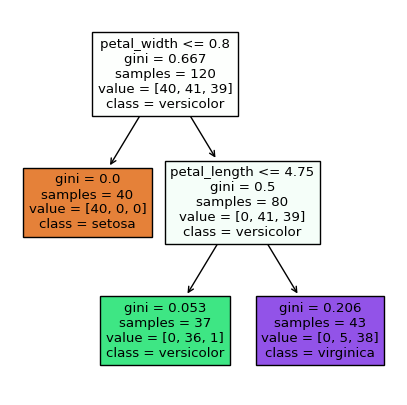

In [142]:
# 시각화할 트리의 크기를 설정
plt.figure(figsize=(5,5))
tree.plot_tree(model,
    class_names=['setosa', 'versicolor', 'virginica'],
    feature_names=feature_names,
    filled=True,
)
plt.show()

1. root node   
petal_width가 0.8보다 작거나 같은 샘플은 개수가 많고, 불순도가 높음.(gini = 0.667)

2. left child node  
매우 순수. petal_width <= 0.8로 완전히 분류됨. petal_width <= 0.8인 모든 샘플들이 setosa 클래스임을 확인.

3. right child node  
높은 불순도. 비교적 큰 샘플을 가짐.(80) 샘플들의 대부분이 versicolor, virginica 클래스.

4. right child node of the right child node  
매우 순수.(gini = 0.053) 샘플들의 대부분이 versicolor 클래스.

5. right child node of the right child node  
비교적 높은 불순도.(gini = 0.206) 샘플들의 대부분이 virginica 클래스.

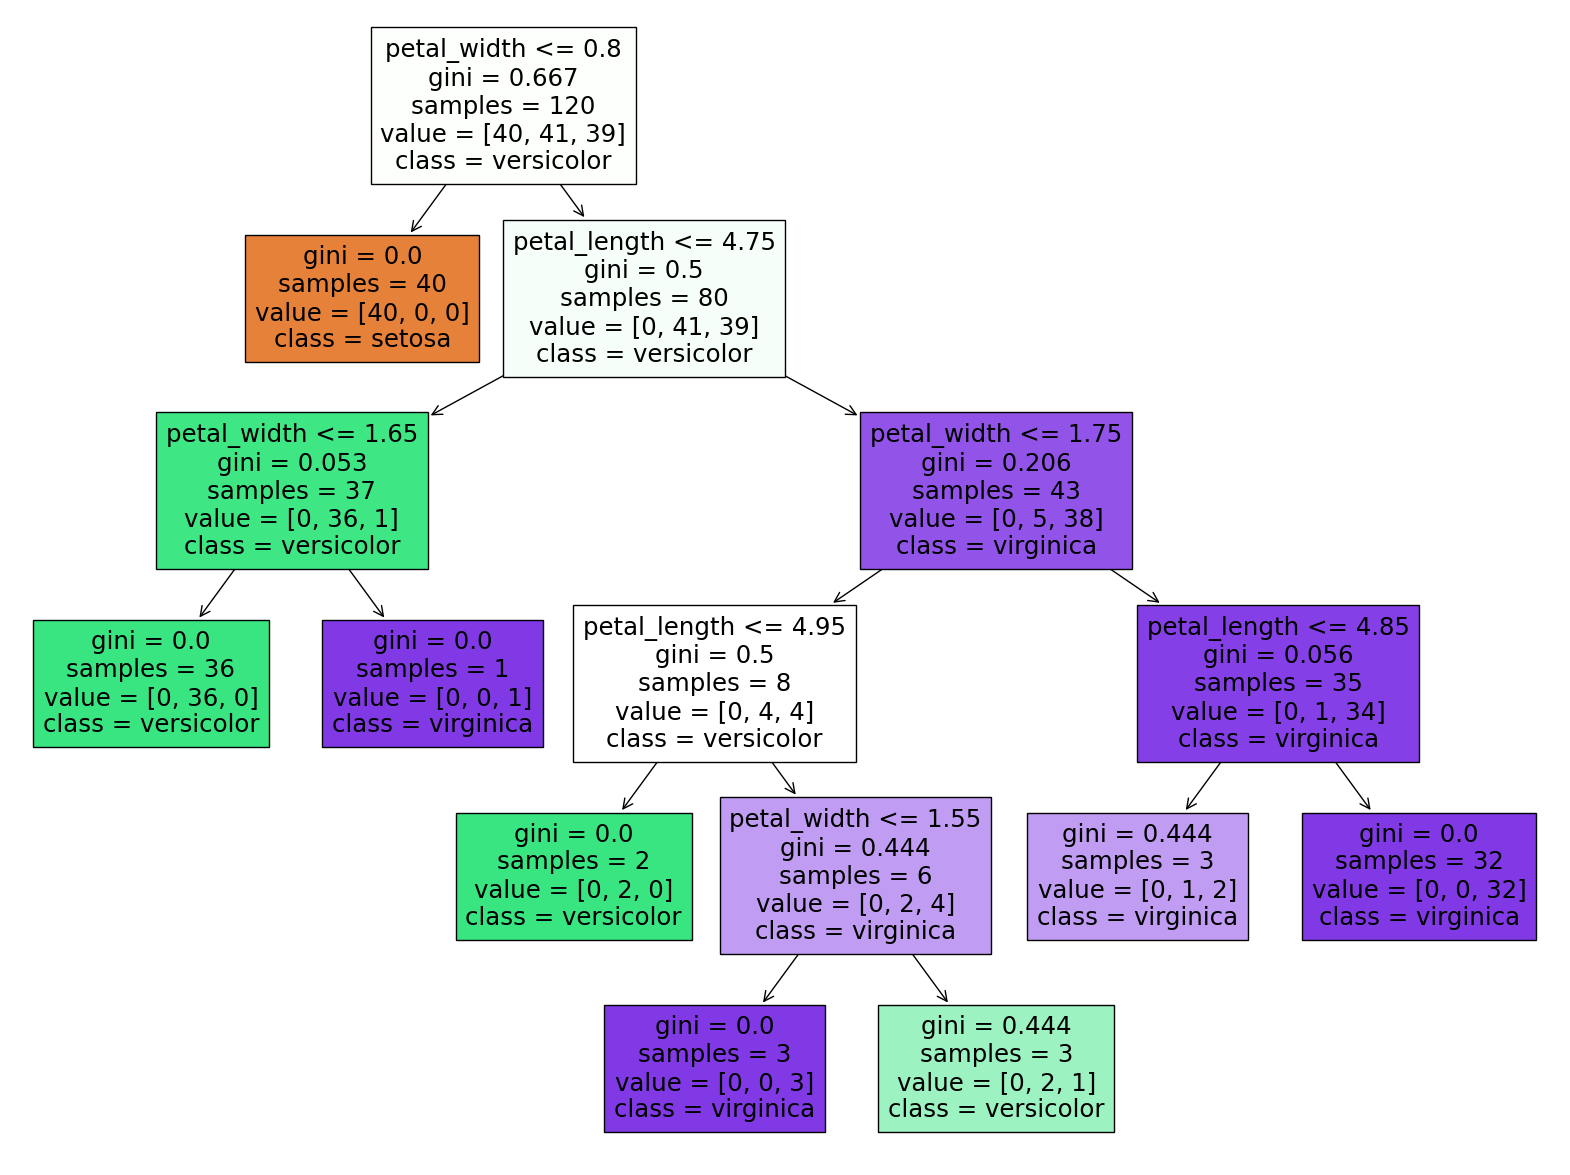

In [143]:
# 모델링 - 깊이 변경
model = DecisionTreeClassifier(max_depth=5, random_state=32)

# 학습
model.fit(train_x, train_y)

# 시각화할 트리의 크기를 설정
plt.figure(figsize=(20,15))
tree.plot_tree(model,
    class_names=['setosa', 'versicolor', 'virginica'],
    feature_names=feature_names,
    filled=True,
)
plt.show()

In [144]:
# 학습 데이터 설정 - 세개 피처 선택
feature_names = [ 'petal_length', 'sepal_width', 'petal_width']
train_x = train[feature_names]
train_y = train['species']

In [145]:
# 모델링 및 학습
model = DecisionTreeClassifier(max_depth=5, random_state=32)
model.fit(train_x, train_y)

DecisionTreeClassifier(max_depth=5, random_state=32)

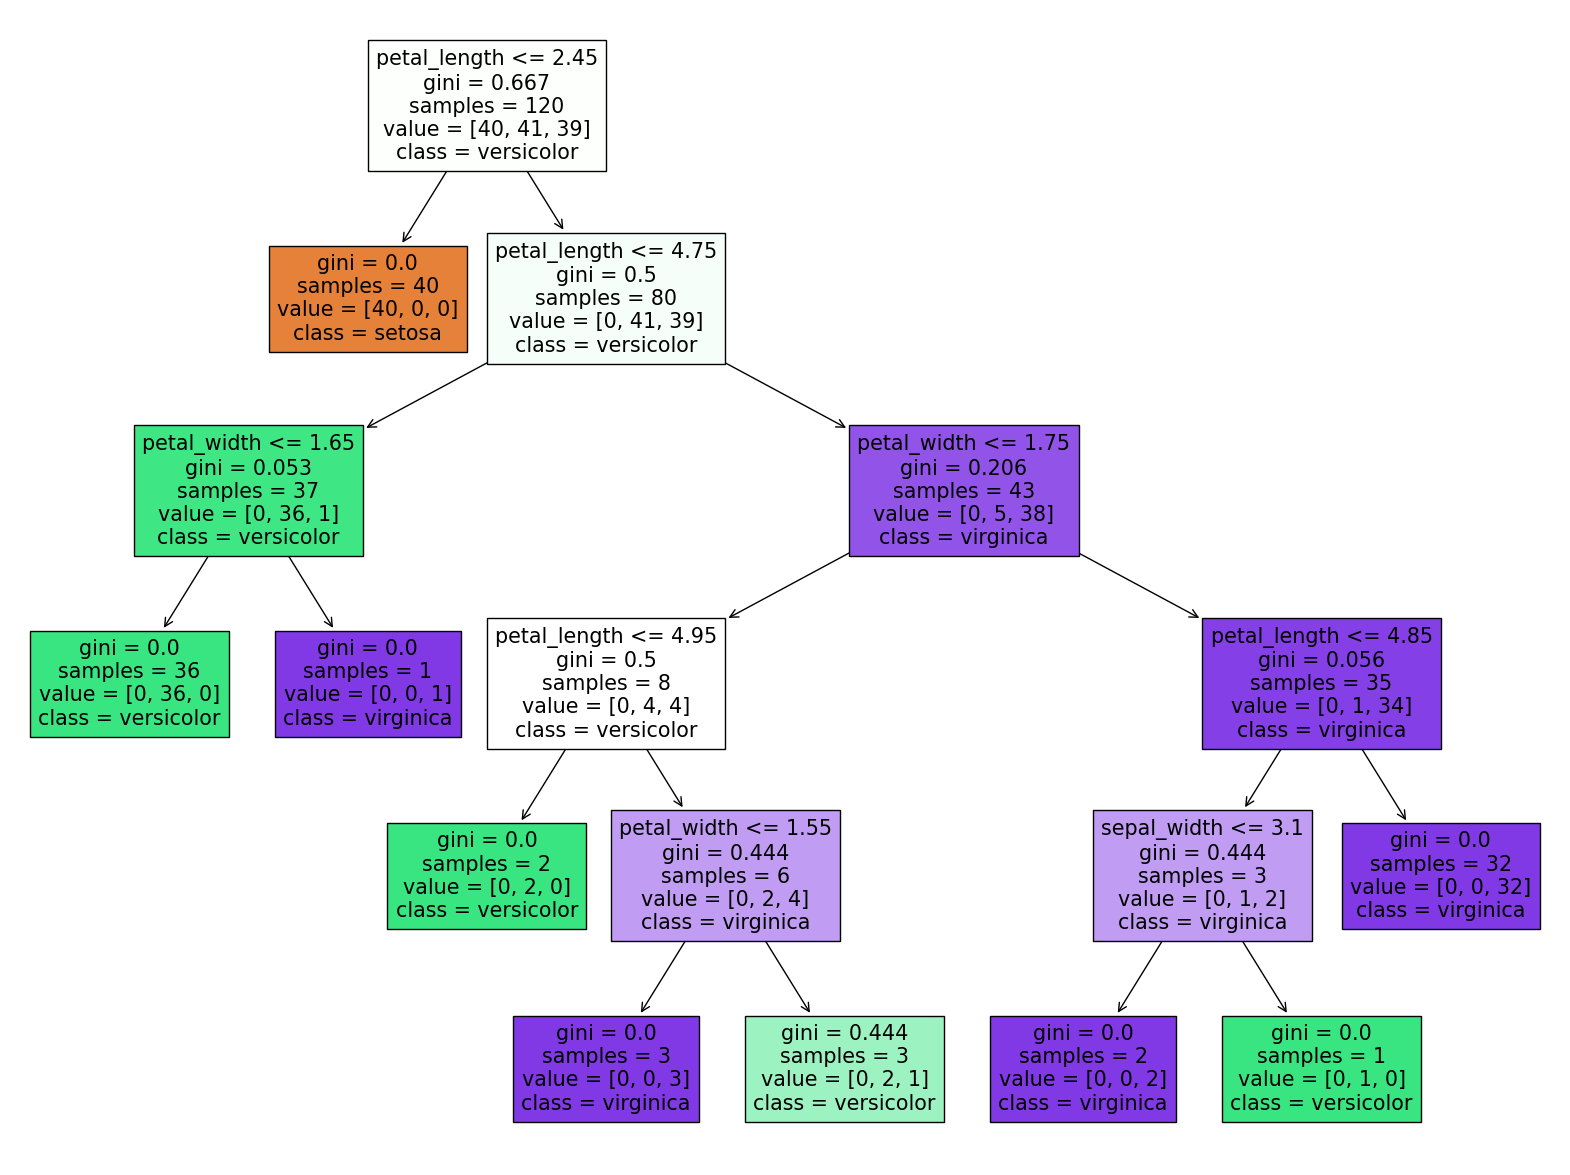

In [146]:
# 시각화할 트리의 크기를 설정
plt.figure(figsize=(20,15))
tree.plot_tree(model,
    class_names=['setosa', 'versicolor', 'virginica'],
    feature_names=feature_names,
    filled=True,
)
plt.show()

In [147]:
# 특정 특성을 선택하여 예측을 수행
feature_names = ['petal_length', 'sepal_width', 'petal_width']
test_x = test[feature_names]

# 모델을 사용하여 예측을 수행
pred = model.predict(test_x)

# 예측 결과를 출력
pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [148]:
# submission 데이터프레임에 예측값을 추가
submission['species'] = pred

# 상위 10개 행을 출력
submission.head(10)

,id,species
0,0,1
1,1,0
2,2,2
3,3,1
4,4,1
5,5,0
6,6,1
7,7,2
8,8,1
9,9,1


In [149]:
# submission 데이터프레임을 CSV 파일로 저장
submission.to_csv('submission.csv', index=False)